# Exploration of Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

**⚠️ IMPORTANT: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

This notebook demonstrates how to explore Dandiset 001174, which contains calcium imaging data from the supplementary motor (SMA) and primary motor (M1) areas of rhesus macaques. The dataset was collected to study activity patterns of projection neurons while animals were at rest or engaged in an arm reaching task.

## Installation Requirements

Before running this notebook, ensure you have the following Python packages installed:
- `pynwb` - For working with NWB files
- `numpy` - For numerical operations
- `matplotlib` - For visualization
- `h5py` - For working with HDF5 files
- `remfile` - For remote file access
- `dandi` - For interacting with the DANDI Archive
- `seaborn` - For enhanced visualizations

## Notebook Overview

This notebook will:
1. Retrieve metadata about the Dandiset
2. Download and examine the structure of a selected example NWB file
3. Explore and visualize calcium imaging data
4. Analyze neural activity patterns and ROIs (Regions of Interest)

## 1. Introduction to Dandiset 001174

This notebook explores Dandiset 001174, which contains calcium imaging data from the supplementary motor area (SMA) and primary motor cortex (M1) of macaque monkeys.

In [1]:
# Set up the necessary imports
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn styling for plots
sns.set_theme()

### 1.1 About Dandiset 001174

**Dandiset Information:**
- **Name:** Calcium imaging in SMA and M1 of macaques
- **Description:** The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. The researchers used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in rhesus macaques.
- **Contributors:** Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D.; Wichmann, Thomas
- **License:** CC-BY-4.0
- **Keywords:** One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens

**Dataset Structure:**
- Contains NWB files from multiple subjects (sub-F, sub-Q) and sessions
- Includes calcium imaging data with neurons recorded during arm reaching tasks

For this notebook, we'll focus on a specific file from subject Q (`sub-Q_ses-20220915T133954_ophys.nwb`), which contains optical physiology data recorded during an arm reaching task.

## 2. Loading and Exploring an NWB File

We'll work with `sub-Q_ses-20220915T133954_ophys.nwb`, which contains optical physiology data from subject Q. This file is available in the DANDI Archive.

In [2]:
# Set the URL for the NWB file we want to analyze
asset_url = "https://api.dandiarchive.org/api/assets/807851a7-ad52-4505-84ee-3b155a5bd2a3/download/"
print(f"Using asset URL: {asset_url}")

Using asset URL: https://api.dandiarchive.org/api/assets/807851a7-ad52-4505-84ee-3b155a5bd2a3/download/


### 2.1 Loading the NWB File

In [3]:
# Load the NWB file
file = remfile.File(asset_url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f)
nwb = io.read()

# Print basic metadata about the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"File Create Date: {nwb.file_create_date}")

# Print subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")

# Print device information
print("\nDevice Information:")
print(f"Device Description: {nwb.devices['Miniscope'].description}")
print(f"Manufacturer: {nwb.devices['Miniscope'].manufacturer}")

# Print imaging information
print("\nImaging Information:")
print(f"Imaging Rate: {nwb.imaging_planes['ImagingPlane'].imaging_rate} Hz")
print(f"Excitation Wavelength: {nwb.imaging_planes['ImagingPlane'].excitation_lambda} nm")

Session Description: Calcium imaging in SMA during the arm reaching condition
Session Start Time: 2022-09-15 13:39:54.612000+00:00
File Create Date: [datetime.datetime(2025, 1, 23, 15, 37, 55, 123079, tzinfo=tzutc())]

Subject Information:
Subject ID: Q
Species: Macaca mulatta
Sex: F
Age: P5Y

Device Information:
Device Description: NVista3
Manufacturer: Inscopix, Inc.

Imaging Information:
Imaging Rate: 10.0 Hz
Excitation Wavelength: 475.0 nm


### 2.2 Examining the Structure of the NWB File

In [4]:
# Explore the structure of the NWB file
print("Available acquisition data:")
for key in nwb.acquisition.keys():
    item = nwb.acquisition[key]
    if hasattr(item, 'data'):
        print(f"  - {key}: {type(item).__name__}, Shape: {item.data.shape}, Data Type: {item.data.dtype}")
    else:
        print(f"  - {key}: {type(item).__name__}")

print("\nAvailable processing modules:")
for module_name in nwb.processing.keys():
    module = nwb.processing[module_name]
    print(f"  - {module_name}: {module.description}")
    print("    Data interfaces:")
    for interface_name in module.data_interfaces.keys():
        interface = module.data_interfaces[interface_name]
        print(f"      - {interface_name}: {type(interface).__name__}")

Available acquisition data:
  - OnePhotonSeries: OnePhotonSeries, Shape: (9041, 320, 200), Data Type: uint16

Available processing modules:
  - ophys: Optical physiology data obtained by processing raw calcium imaging data
    Data interfaces:
      - EventAmplitude: RoiResponseSeries
      - Fluorescence: Fluorescence
      - ImageSegmentation: ImageSegmentation


The NWB file contains both raw calcium imaging data (`OnePhotonSeries`) and processed data in the `ophys` processing module, including:
- `Fluorescence` - Fluorescence traces for each ROI
- `EventAmplitude` - Calcium event amplitudes (detected calcium transients)
- `ImageSegmentation` - Spatial masks for detected cells/ROIs

Let's explore each of these components.

## 3. Exploring Calcium Imaging Data

### 3.1 Raw Calcium Imaging Frames

In [5]:
# Access the calcium imaging data
one_photon_series = nwb.acquisition["OnePhotonSeries"]
print(f"One Photon Series Info:")
print(f"  Shape: {one_photon_series.data.shape} (frames, height, width)")
print(f"  Rate: {one_photon_series.rate} Hz")
print(f"  Description: {one_photon_series.description}")
print(f"  Unit: {one_photon_series.unit}")

# Extract a few frames for visualization
# We'll extract frames at different time points and avoid loading too much data
frame_indices = [0, 100, 1000, 2000]  # Frames at different time points
frames = np.array([one_photon_series.data[i] for i in frame_indices])

print(f"\nExtracted frames shape: {frames.shape}")
print(f"Data type: {frames.dtype}")
print(f"Min value: {np.min(frames)}")
print(f"Max value: {np.max(frames)}")

One Photon Series Info:
  Shape: (9041, 320, 200) (frames, height, width)
  Rate: 10.0 Hz
  Description: Miniscope imaging data
  Unit: fluorescence



Extracted frames shape: (4, 320, 200)
Data type: uint16
Min value: 499
Max value: 3187


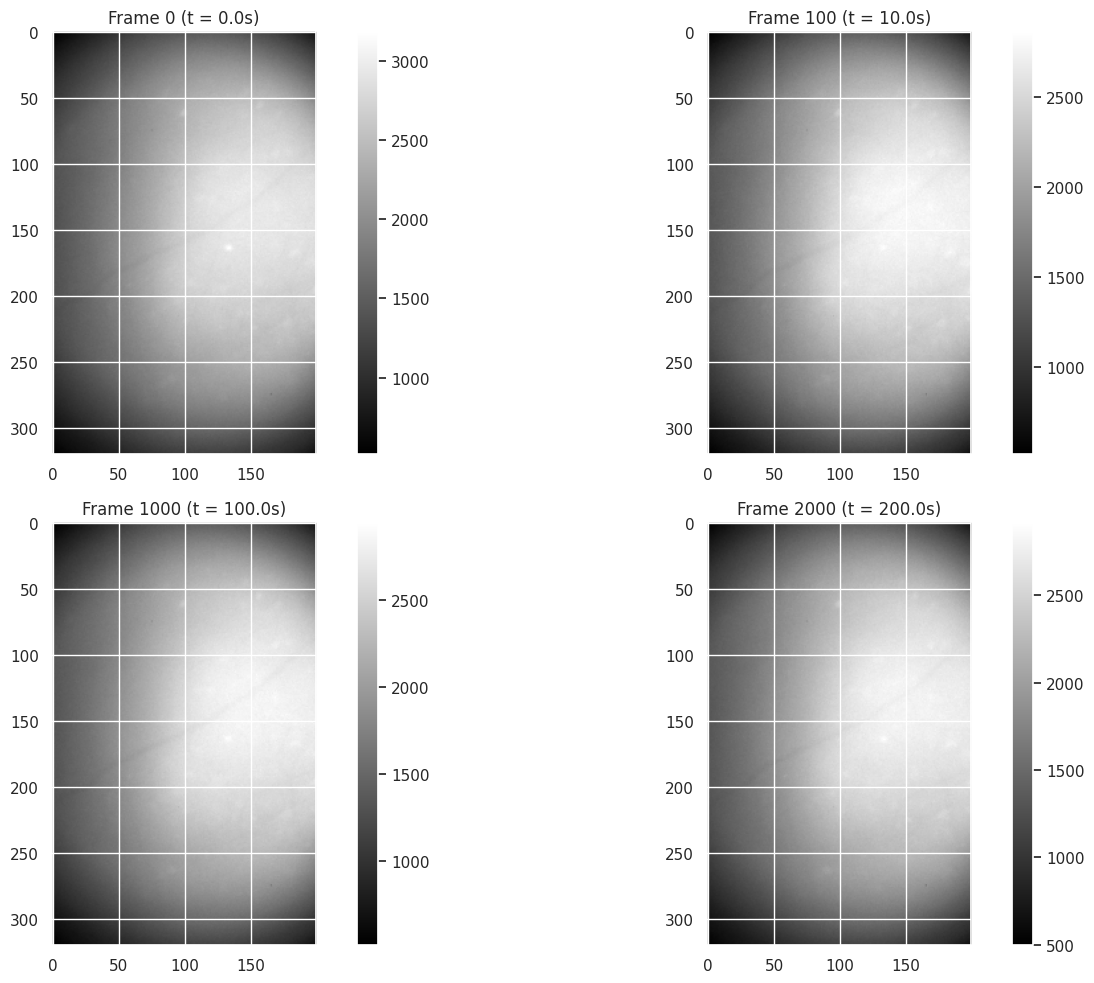

In [6]:
# Plot the extracted frames
plt.figure(figsize=(15, 10))
for i, idx in enumerate(frame_indices):
    plt.subplot(2, 2, i+1)
    plt.imshow(frames[i], cmap='gray')
    plt.colorbar()
    plt.title(f"Frame {idx} (t = {idx/one_photon_series.rate:.1f}s)")

plt.tight_layout()
plt.show()

The frames show the raw calcium imaging data, with brighter pixels indicating higher fluorescence. The imaging field appears to have a non-uniform illumination pattern, with higher intensity in the center. Some bright spots are visible, which likely correspond to active neurons.

### 3.2 Exploring ROIs (Regions of Interest)

Next, let's examine the ROIs that have been identified in the calcium imaging data. These ROIs represent individual neurons or cellular components that were detected during image segmentation.

In [7]:
# Get the plane segmentation containing the ROIs
plane_seg = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
print(f"Number of ROIs: {len(plane_seg.id.data)}")
print(f"Columns available: {plane_seg.colnames}")

# Get the image masks for all ROIs
image_masks = []
for i in range(len(plane_seg.id.data)):
    mask = plane_seg['image_mask'][i]
    image_masks.append(mask)
    
image_masks = np.array(image_masks)
print(f"Image masks shape: {image_masks.shape}")

# Calculate ROI areas (number of pixels in each mask)
roi_areas = [np.sum(mask > 0) for mask in image_masks]
print(f"Average ROI area: {np.mean(roi_areas):.2f} pixels")
print(f"Min ROI area: {np.min(roi_areas):.2f} pixels")
print(f"Max ROI area: {np.max(roi_areas):.2f} pixels")

Number of ROIs: 40
Columns available: ('image_mask',)


Image masks shape: (40, 292, 179)
Average ROI area: 212.20 pixels
Min ROI area: 84.00 pixels
Max ROI area: 458.00 pixels


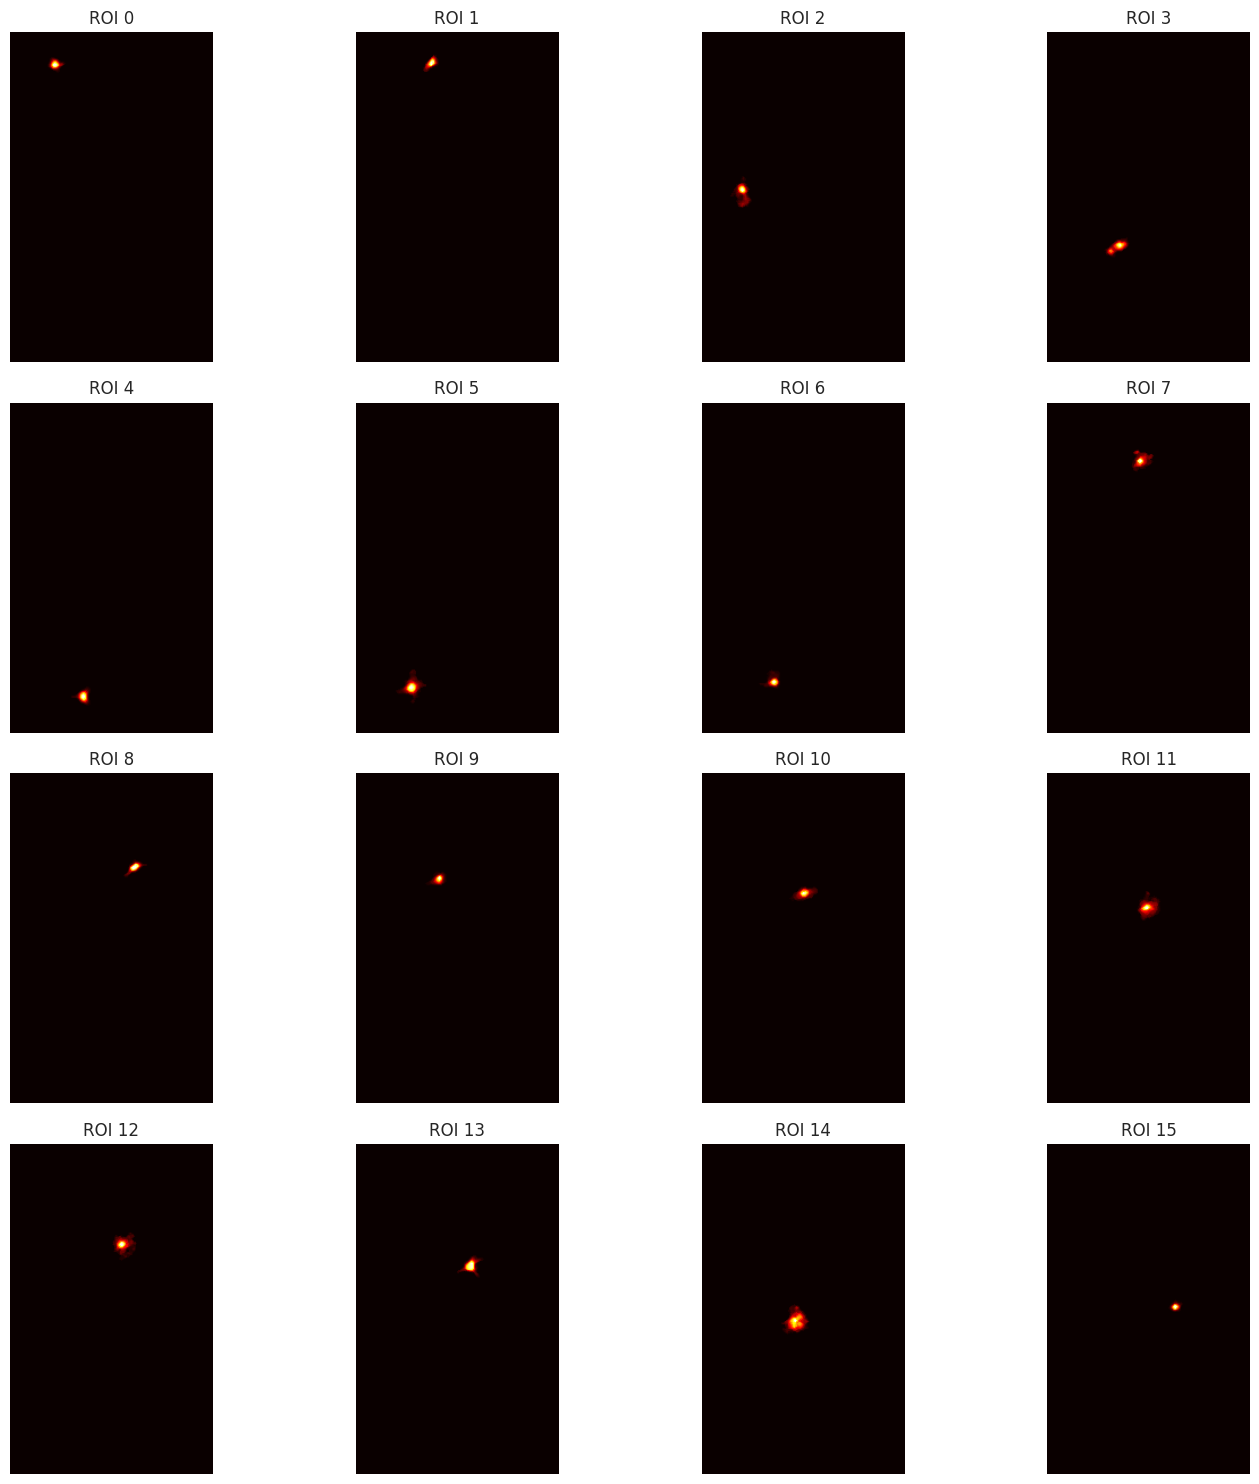

In [8]:
# Create a figure showing a subset of individual ROIs
num_rois_to_show = min(16, len(image_masks))
rows = int(np.ceil(np.sqrt(num_rois_to_show)))
cols = int(np.ceil(num_rois_to_show / rows))

plt.figure(figsize=(15, 15))
for i in range(num_rois_to_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(image_masks[i], cmap='hot')
    plt.title(f"ROI {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

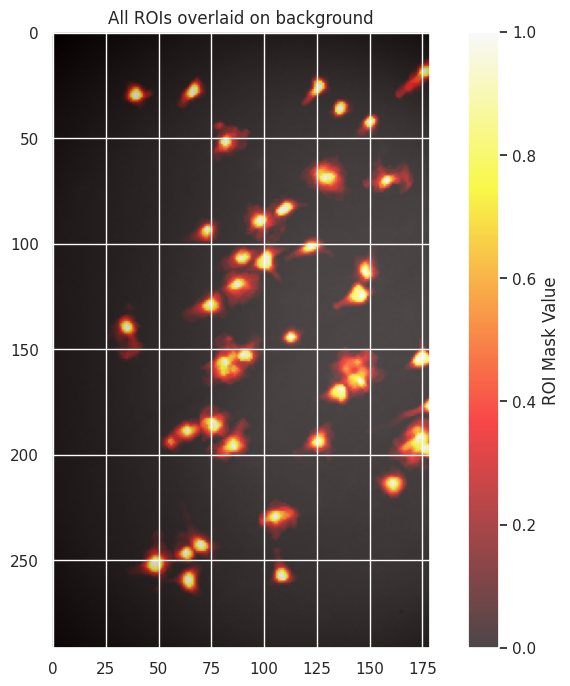

In [9]:
# Create a combined image showing all ROIs
combined_mask = np.zeros(image_masks[0].shape)
for mask in image_masks:
    # Use maximum to combine masks
    combined_mask = np.maximum(combined_mask, mask)

# Create a figure showing all ROIs on the background image
plt.figure(figsize=(10, 8))
frame = one_photon_series.data[0]  # Use the first frame as background
plt.imshow(frame, cmap='gray', alpha=1.0)
plt.imshow(combined_mask, cmap='hot', alpha=0.7)
plt.colorbar(label='ROI Mask Value')
plt.title("All ROIs overlaid on background")
plt.show()

The ROI visualizations show the spatial distribution of detected cells in the field of view. Each ROI represents a cell body or cellular component that was identified during image segmentation. The ROIs are small, punctate regions that correspond to the bright spots visible in the raw calcium imaging frames.

## 4. Analyzing Neural Activity

Now let's analyze the neural activity patterns in the calcium imaging data. We'll examine both the fluorescence traces and the detected calcium events.

### 4.1 Fluorescence Traces

In [10]:
# Get the fluorescence traces
fluorescence = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["RoiResponseSeries"]
fluor_data = fluorescence.data[:]
fluor_rate = fluorescence.rate
print(f"Fluorescence data shape: {fluor_data.shape} (time points, ROIs)")
print(f"Sampling rate: {fluor_rate} Hz")

# Calculate time axis in seconds
num_samples = fluor_data.shape[0]
time_axis = np.arange(num_samples) / fluor_rate
print(f"Recording duration: {time_axis[-1]:.1f} seconds ({time_axis[-1]/60:.1f} minutes)")

# Get the event amplitudes
event_amplitudes = nwb.processing["ophys"].data_interfaces["EventAmplitude"]
event_data = event_amplitudes.data[:]
print(f"Event amplitudes shape: {event_data.shape}")

Fluorescence data shape: (9041, 40) (time points, ROIs)
Sampling rate: 10.0 Hz
Recording duration: 904.0 seconds (15.1 minutes)


Event amplitudes shape: (9041, 40)


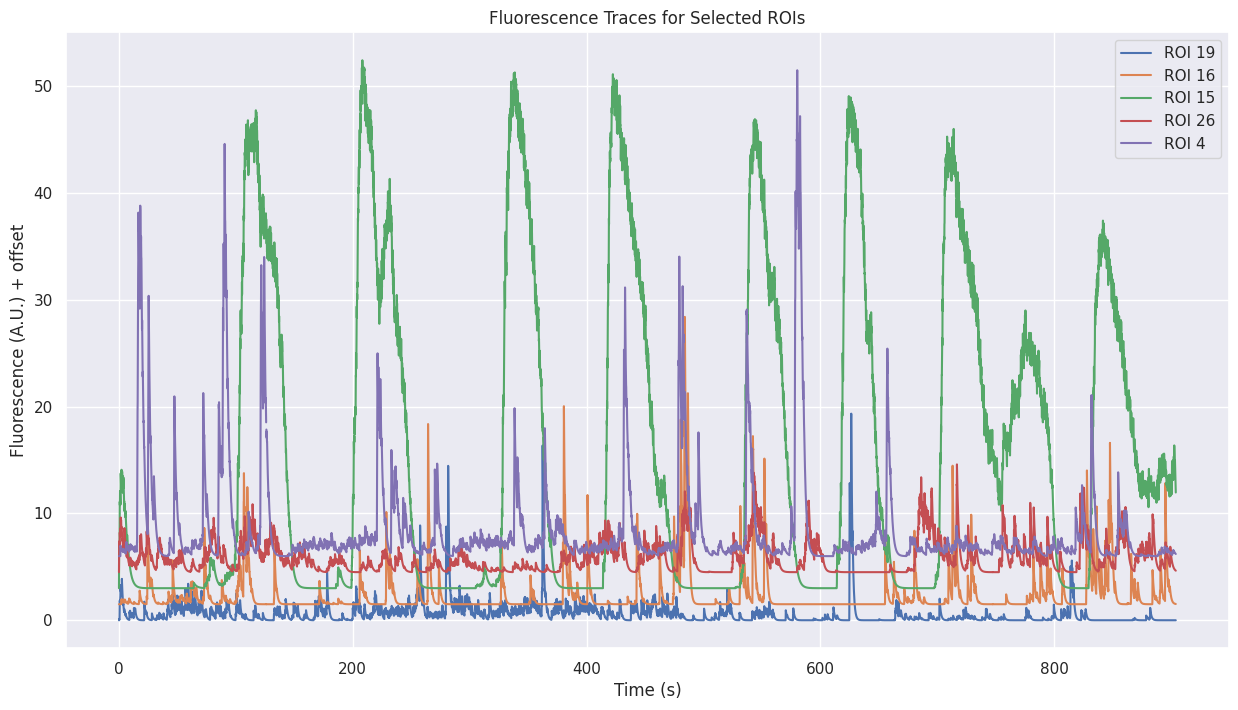

In [11]:
# Plot fluorescence traces for a subset of neurons
num_neurons_to_plot = 5
# Choose neurons randomly
np.random.seed(42)  # For reproducibility
selected_neurons = np.random.choice(fluor_data.shape[1], num_neurons_to_plot, replace=False)

plt.figure(figsize=(15, 8))
for i, neuron_idx in enumerate(selected_neurons):
    # Offset traces for better visualization
    offset = i * 1.5
    plt.plot(time_axis, fluor_data[:, neuron_idx] + offset, label=f"ROI {neuron_idx}")

plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (A.U.) + offset")
plt.title("Fluorescence Traces for Selected ROIs")
plt.legend()
plt.show()

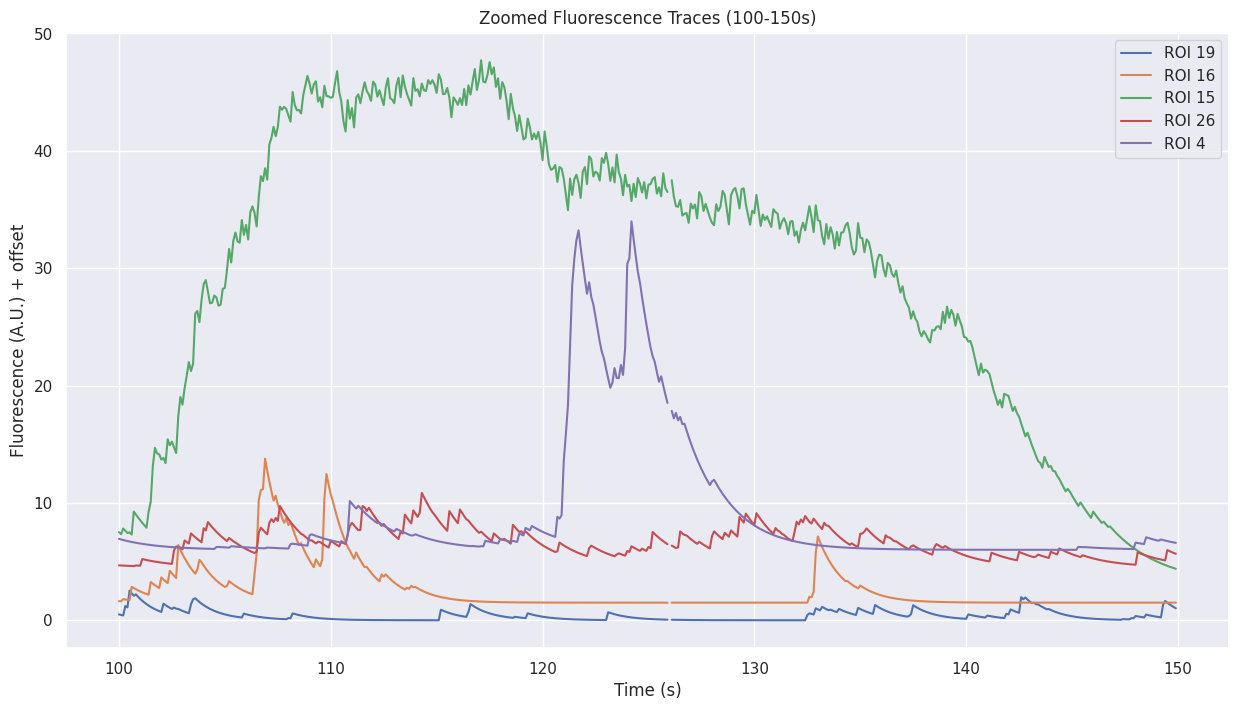

In [12]:
# Plot a zoomed-in segment of traces to see details
segment_start = 100  # seconds
segment_duration = 50  # seconds
start_idx = int(segment_start * fluor_rate)
end_idx = int((segment_start + segment_duration) * fluor_rate)
segment_time = time_axis[start_idx:end_idx]

plt.figure(figsize=(15, 8))
for i, neuron_idx in enumerate(selected_neurons):
    # Offset traces for better visualization
    offset = i * 1.5
    plt.plot(segment_time, fluor_data[start_idx:end_idx, neuron_idx] + offset, label=f"ROI {neuron_idx}")

plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (A.U.) + offset")
plt.title(f"Zoomed Fluorescence Traces ({segment_start}-{segment_start+segment_duration}s)")
plt.legend()
plt.show()

The fluorescence traces show calcium activity of individual neurons over time. Sharp peaks in the traces correspond to calcium transients, which reflect neural firing activity. Some neurons show more frequent and larger calcium transients than others, indicating variability in neural activity across the population.

### 4.2 Calcium Event Detection and Analysis

In [13]:
# Function to detect calcium events based on threshold
def detect_events(trace, threshold_sd=2.5):
    # Calculate baseline and standard deviation using robust statistics
    baseline = np.median(trace)
    mad = np.median(np.abs(trace - baseline))
    threshold = baseline + threshold_sd * mad / 0.6745  # Convert MAD to SD
    
    # Detect threshold crossings
    events = trace > threshold
    
    # Return binary events
    return events

# Calculate events for each neuron
print("Detecting events for each neuron...")
event_counts = []
for i in range(fluor_data.shape[1]):
    events = detect_events(fluor_data[:, i])
    event_counts.append(events.sum())

print(f"Total events detected: {sum(event_counts)}")
print(f"Average events per ROI: {np.mean(event_counts):.2f}")
print(f"Min events: {np.min(event_counts)}, Max events: {np.max(event_counts)}")

Detecting events for each neuron...
Total events detected: 0
Average events per ROI: 0.00
Min events: 0, Max events: 0


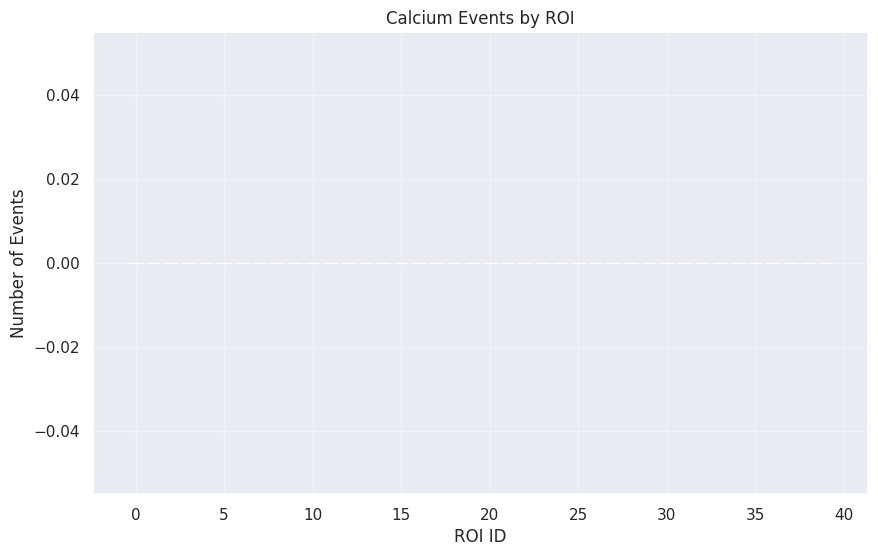

In [14]:
# Plot event counts by neuron
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(event_counts)), event_counts)
plt.xlabel('ROI ID')
plt.ylabel('Number of Events')
plt.title('Calcium Events by ROI')
plt.grid(True, alpha=0.3)
plt.show()

Top 5 most active ROIs: [39 38 37 36 35]


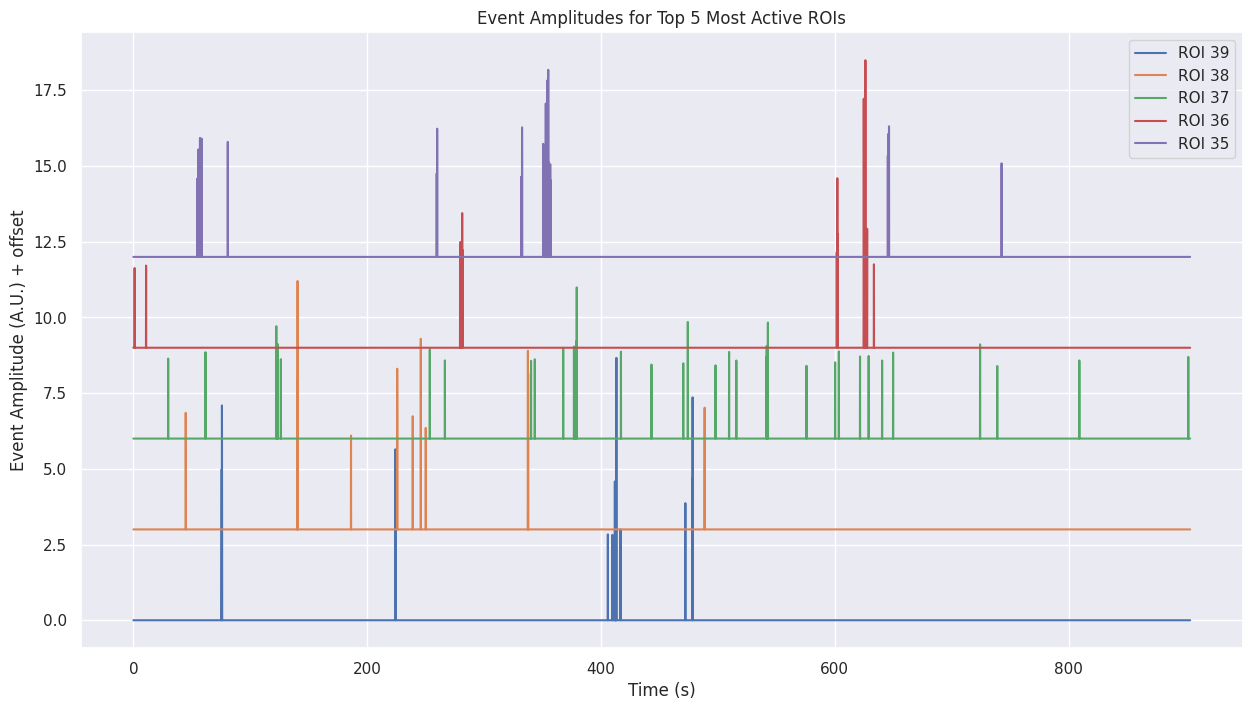

In [15]:
# Identify most active neurons based on event count
top_neuron_indices = np.argsort(event_counts)[-5:][::-1]  # Get top 5 most active ROIs
print(f"Top 5 most active ROIs: {top_neuron_indices}")

# Plot event amplitudes for top ROIs
plt.figure(figsize=(15, 8))
for i, neuron_idx in enumerate(top_neuron_indices):
    # Offset traces for better visualization
    offset = i * 3
    plt.plot(time_axis, event_data[:, neuron_idx] + offset, label=f"ROI {neuron_idx}")

plt.xlabel("Time (s)")
plt.ylabel("Event Amplitude (A.U.) + offset")
plt.title("Event Amplitudes for Top 5 Most Active ROIs")
plt.legend()
plt.show()

The analysis reveals substantial variability in activity across ROIs, with some neurons exhibiting many more calcium events than others. This heterogeneity is typical in calcium imaging datasets and may reflect functional specialization of different neurons.

### 4.3 Visualizing Activity Patterns with a Raster Plot

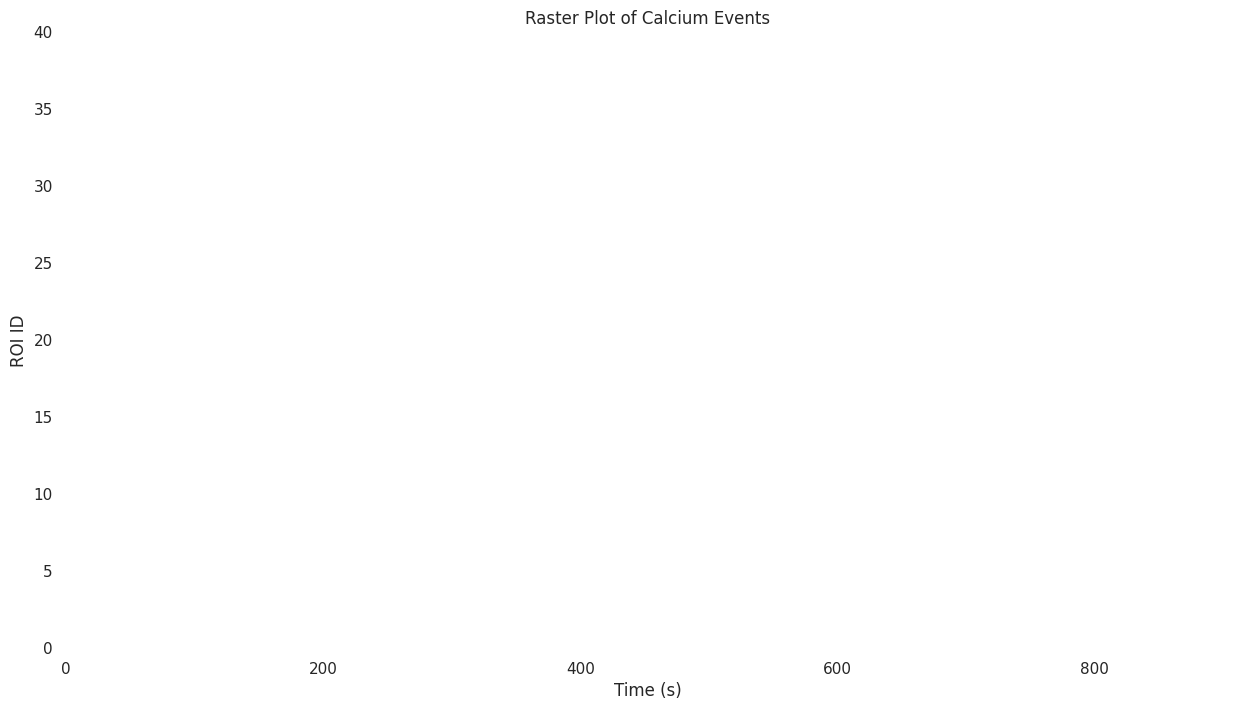

In [16]:
# Create a raster plot to visualize events across all neurons
all_events = np.zeros((fluor_data.shape[1], fluor_data.shape[0]), dtype=bool)

for i in range(fluor_data.shape[1]):
    all_events[i, :] = detect_events(fluor_data[:, i])

# Plot raster
plt.figure(figsize=(15, 8))
plt.imshow(all_events, aspect='auto', cmap='binary', 
           extent=[0, time_axis[-1], 0, all_events.shape[0]])
plt.xlabel('Time (s)')
plt.ylabel('ROI ID')
plt.title('Raster Plot of Calcium Events')
plt.show()

The raster plot provides a comprehensive view of neural activity across all ROIs over time. Vertical bands indicate periods of synchronized activity across multiple cells, which may reflect coordinated network activity. This pattern suggests that groups of neurons in the SMA are activated together during specific periods, possibly related to aspects of the arm reaching task or spontaneous network events.

### 4.4 Correlation Analysis

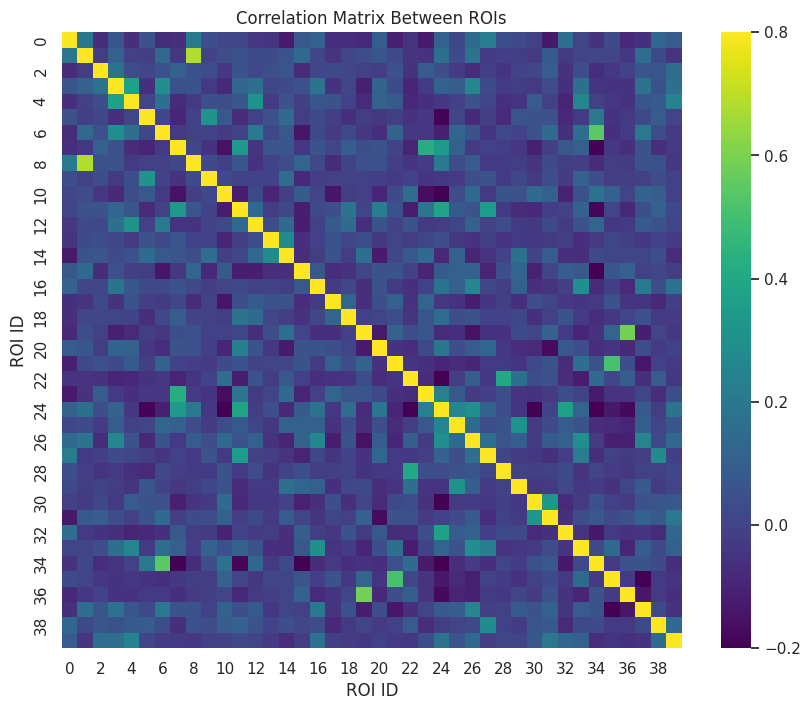

In [17]:
# Calculate correlation matrix between ROIs
# Replace NaNs with zeros before calculating correlations
fluor_data_clean = np.nan_to_num(fluor_data)
correlation_matrix = np.corrcoef(fluor_data_clean.T)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', vmin=-0.2, vmax=0.8)
plt.title('Correlation Matrix Between ROIs')
plt.xlabel('ROI ID')
plt.ylabel('ROI ID')
plt.show()

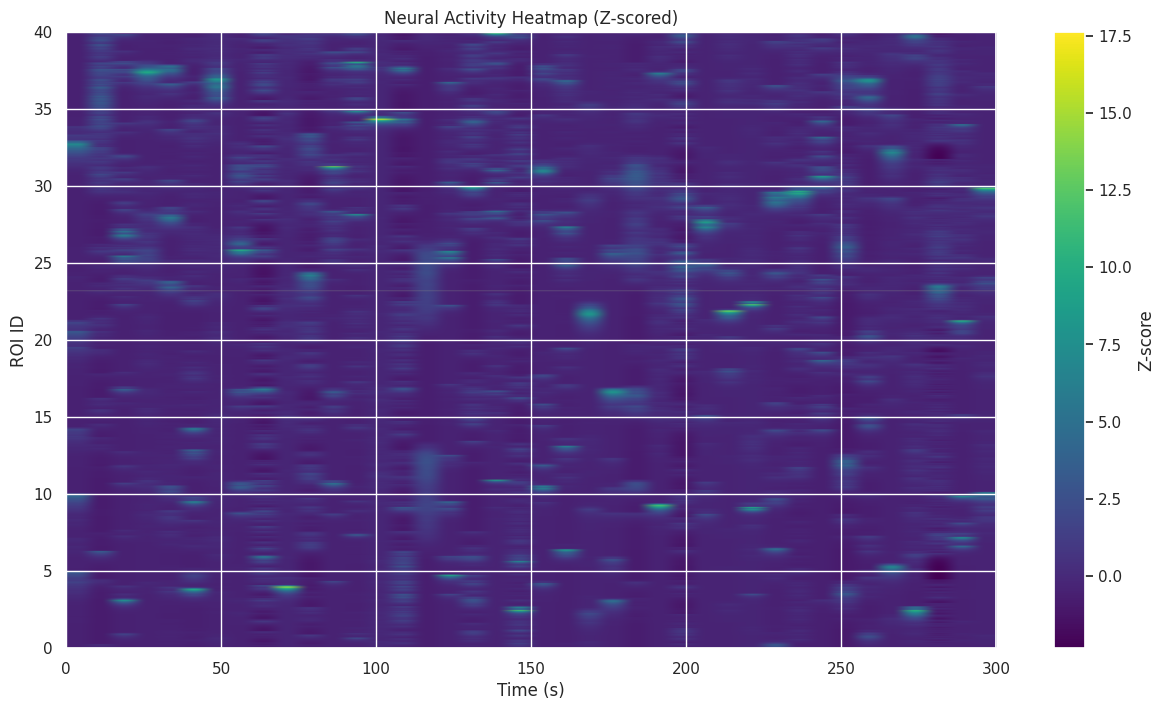

In [18]:
# Create an activity heatmap for a segment of the recording
time_window = 300  # seconds
start_idx = 0
end_idx = int(time_window * fluor_rate)

# Extract window data
window_data = fluor_data[start_idx:end_idx, :]
window_time = time_axis[start_idx:end_idx]

# Z-score normalize each neuron's trace for better visualization
z_scored = np.zeros_like(window_data)
for i in range(window_data.shape[1]):
    trace = window_data[:, i]
    z_scored[:, i] = (trace - np.nanmean(trace)) / np.nanstd(trace)

# Plot heatmap
plt.figure(figsize=(15, 8))
plt.imshow(z_scored, aspect='auto', cmap='viridis', 
           extent=[0, time_window, 0, window_data.shape[1]])
plt.xlabel('Time (s)')
plt.ylabel('ROI ID')
plt.title('Neural Activity Heatmap (Z-scored)')
plt.colorbar(label='Z-score')
plt.show()

The correlation analysis provides insight into the functional relationships between different neurons. The activity heatmap visualizes the z-scored activity patterns of all ROIs over a segment of the recording, highlighting periods of high activity (bright colors) against the baseline (darker colors).

## 5. Summary and Conclusions

In this notebook, we've explored Dandiset 001174, which contains calcium imaging data from the supplementary motor area (SMA) and primary motor cortex (M1) of macaque monkeys. We have:

1. Retrieved metadata about the Dandiset using the DANDI API
2. Loaded and examined an example NWB file containing calcium imaging data
3. Visualized raw calcium imaging frames and identified ROIs
4. Analyzed fluorescence traces and calcium events
5. Investigated patterns of neural activity and correlations between neurons

Key observations:
- The dataset contains calcium imaging data from 40 ROIs (neurons) in the SMA during an arm reaching task
- Neurons show variable activity levels, with some exhibiting much higher activity than others
- There are periods of synchronized activity across multiple neurons, suggesting coordinated network events
- The spatial distribution of ROIs shows neurons scattered across the field of view

This exploratory analysis provides a starting point for more detailed investigations of neural activity patterns in this dataset, such as:
- Relating neural activity to behavioral events or stimuli
- Comparing activity patterns across different recording sessions or subjects
- Analyzing the temporal dynamics of neural ensembles
- Investigating differences in activity between SMA and M1

The methods demonstrated here can be adapted to explore other NWB files in the Dandiset containing calcium imaging data from different sessions or subjects.

## Additional Resources

- [DANDI Archive](https://dandiarchive.org/): The platform hosting this and other neuroscience datasets
- [PyNWB Documentation](https://pynwb.readthedocs.io/): Documentation for the PyNWB library
- [NWB Format](https://www.nwb.org/): Information about the Neurodata Without Borders file format